# Chemspace Explorer Initialization

In [1]:
import sys
import os

# Get path to the parent directory containing the package
MAIN_FOLDER = os.path.abspath(os.path.join(os.getcwd(), '../ms_chemical_space_explorer'))
DATA_FOLDER = "data"
PROCESSED_DATA_FOLDER = "processed"
FILENAME = os.path.join(MAIN_FOLDER, DATA_FOLDER, PROCESSED_DATA_FOLDER, "1000_test_spectra.mgf")
PICKLE = "pickle"

print(f"Adding to path: {MAIN_FOLDER}")
sys.path.append(MAIN_FOLDER)

Adding to path: g:\Dokumente\Studium\MMI\Master-Arbeit\Code\ms_chemical_space_explorer


In [2]:
import pickle
from ms_chemical_space_explorer.chemical_space_explorer import start_workflow, run_analogue_search

def analogue_search(n: int = 2):
    file = os.path.join(PICKLE, f'results_n={n}.pkl')
    try:
        with open(file, 'rb') as f:
            analogues = pickle.load(f)
            print(f"Loaded analogues from {file}")
    
    except FileNotFoundError:
        explorer = start_workflow(os.path.abspath(os.path.join(MAIN_FOLDER, DATA_FOLDER, PROCESSED_DATA_FOLDER)))
        analogues = run_analogue_search(explorer, FILENAME, n)
        
        with open(file, 'wb') as f:
            pickle.dump(analogues, f)
        print(f"Analogues saved to {file}")
        
    return analogues

#### somethimes this works, sometimes the approach above

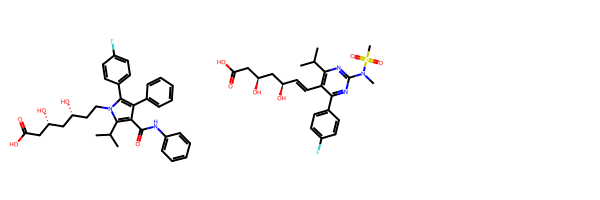

In [3]:
# some unrelated more complex mols 
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

atorvastatin = Chem.MolFromSmiles('O=C(O)C[C@H](O)C[C@H](O)CCn2c(c(c(c2c1ccc(F)cc1)c3ccccc3)C(=O)Nc4ccccc4)C(C)C')
rosuvastatin = Chem.MolFromSmiles('OC(=O)C[C@H](O)C[C@H](O)\C=C\c1c(C(C)C)nc(N(C)S(=O)(=O)C)nc1c2ccc(F)cc2')
MolsToGridImage((atorvastatin,rosuvastatin)) 

# Code

## Load Analogues and import methods

### Load Query Spectra

In [4]:
from ms_chemical_space_explorer.chemical_space_explorer import spectra_importer

query_spectra = spectra_importer(FILENAME)

Processing spectra: 100%|██████████| 1000/1000 [00:04<00:00, 240.79it/s]


Examples for a bad matches: QUERY_SPECTRUM_ID = 8

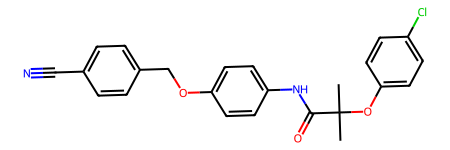

In [596]:
QUERY_SPECTRUM_ID = 153
query_mol = Chem.MolFromSmiles(query_spectra[QUERY_SPECTRUM_ID].metadata["smiles"])
query_mol

### Load Analogues

In [597]:
import pandas as pd

all_analogues = analogue_search(n=3)
all_analogues

Loaded analogues from pickle\results_n=3.pkl


,smiles,predicted distance,mean distance,std distance,isf,candidate mean similarity,candidate std similarity,precursor-mz-diff,visual_x,visual_y,inchikey,query_spectrum_id,ionmode
1482,CCCCC\C=C/C\C=C/CCCCCCCC(=O)OCC(COP(O)(=O)OC1C...,0.037059,0.039915,0.005182,0.966980,0.951327,0.039300,-4.033600,10.855725,2.893498,IDBHHLONPONREV,176,negative
1483,CCCCCCCCCCCCCCCCC(=O)OCC(COP(O)(=O)OC1C(O)C(O)...,0.039129,0.039915,0.005182,0.966980,0.951327,0.039300,-14.021600,6.573919,3.105054,NHCUHDJVBAQLLF,176,negative
1484,CCCCCCCCCCCCCCCCCC(=O)OCC(COP(O)(=O)OC1C(O)C(O...,0.040339,0.039915,0.005182,0.966980,0.951327,0.039300,2.010600,14.638113,-5.208595,GGSSNEAFVQRIHU,176,negative
1691,CCCCC/C=C\C/C=C\C/C=C\CCCCCCC(=O)O[C@H](COC(=O...,0.042183,0.036931,0.004866,0.964284,0.947459,0.039397,19.968000,8.401516,1.257386,DYTUHXQCMCKAHL,245,negative
1690,CCCCC\C=C/C\C=C/CCCCCCCC(=O)OCC(COP(O)(=O)OC1C...,0.039124,0.036931,0.004866,0.964284,0.947459,0.039397,-6.041800,12.741820,0.653669,PJGBJPJEYMOHKG,245,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Cn1cncc1C[C@@H](C(=O)O)N,0.215882,0.190069,0.046234,0.112656,0.035263,0.170949,0.010830,8.573842,1.309396,JDHILDINMRGULE,355,positive
62,N1C=NC2=C1C=NC=N2,0.114903,0.127105,0.011707,0.110706,0.065361,0.230543,-46.030500,11.015861,4.740924,KDCGOANMDULRCW,304,positive
840,NC(N)=O,0.104779,0.161976,0.032626,0.106825,0.010000,0.099499,-59.025321,14.382889,4.222836,XSQUKJJJFZCRTK,564,positive
892,CN1C=NC=C1,0.322333,0.310428,0.011798,0.099405,0.020233,0.139976,-47.025875,16.075138,0.348935,MCTWTZJPVLRJOU,582,positive


In [598]:
from ms_chemical_space_explorer.fragment_extractor import generate_mols_from_spectrum_query

# Pick analogues for a specific spectrum
query_analogues_df = all_analogues[all_analogues["query_spectrum_id"] == QUERY_SPECTRUM_ID]
query_analogues_df

,smiles,predicted distance,mean distance,std distance,isf,candidate mean similarity,candidate std similarity,precursor-mz-diff,visual_x,visual_y,inchikey,query_spectrum_id,ionmode
1413,O=C(O)c1c(I)c(O)c(I)cc1I,0.183506,0.186392,0.006736,0.243711,0.192781,0.265271,95.59757,8.672396,1.943534,GIAVHGFPMPSIFI,153,negative
1414,CC(=O)Nc1c(I)cc(I)c(C(=O)O)c1I,0.185668,0.186392,0.006736,0.230823,0.192781,0.265271,136.62412,12.350023,0.726629,GNOGSFBXBWBTIG,153,negative
1415,CC(C)c1cc2c(c(O)c(I)c(=O)o2)c(=O)n1-c1ccccc1,0.179077,0.186392,0.006736,0.221812,0.192781,0.265271,2.87269,8.920499,-1.491845,RMAWBWQZZAPUNF,153,negative


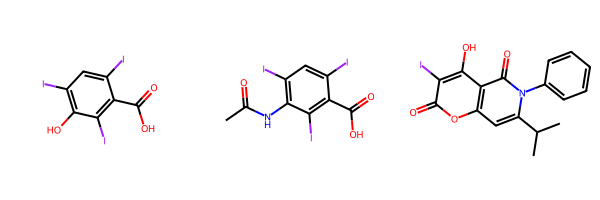

In [599]:
# generate rdkit mols and preapre them for visualization
query_analogues = generate_mols_from_spectrum_query(spectrum_query_result=query_analogues_df)

MolsToGridImage(query_analogues)

## Similarity Maps

In [600]:
# Morgan fingerprint parameters
MORGAN_RADIUS = 9
NBITS = 2048
USE_FEATURES = False
FPTYPE = "bv"           # "bv" or "count"
# SimMap Fragment parameters
SIM_MAP_THESHOLD = 0.2
# visualization in this notebook
FRAGMENTS_PER_ROW = 5

In [601]:
from rdkit.Chem.Draw import SimilarityMaps

def MorganWrapper(mol, atomId, **kwargs):
    return SimilarityMaps.GetMorganFingerprint(mol, atomId, radius=MORGAN_RADIUS, fpType=FPTYPE, nBits=NBITS, useFeatures=USE_FEATURES, **kwargs)

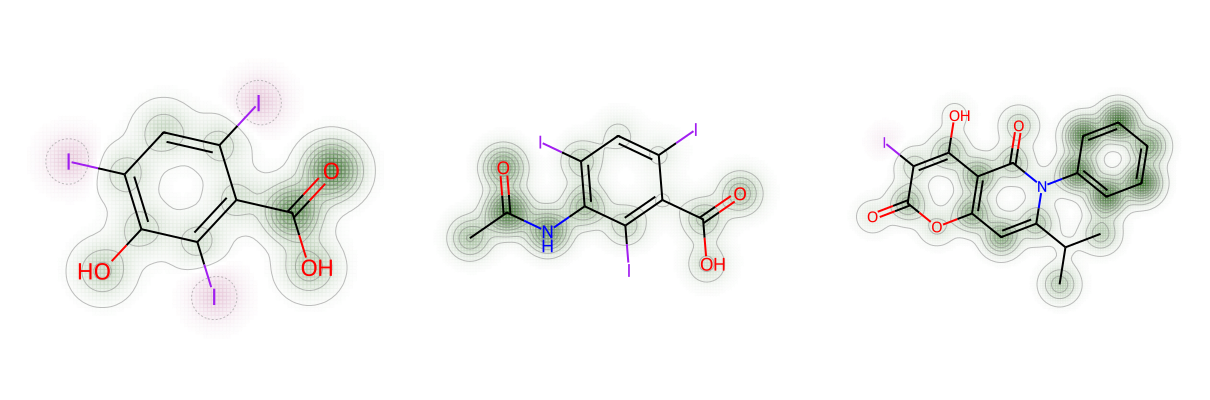

In [602]:
from rdkit.Chem import Draw
from ms_chemical_space_explorer.chemical_space_visualizer import draw_sim_map, draw_images, create_sim_maps, draw_mol

draw2d = Draw.MolDraw2DCairo(400, 400)

query_sim_maps = []
for analogue in query_analogues:
    query_sim_maps.append(draw_sim_map(draw2d, query_mol, analogue, MorganWrapper, size = (10, 10)))

draw_images(query_sim_maps)

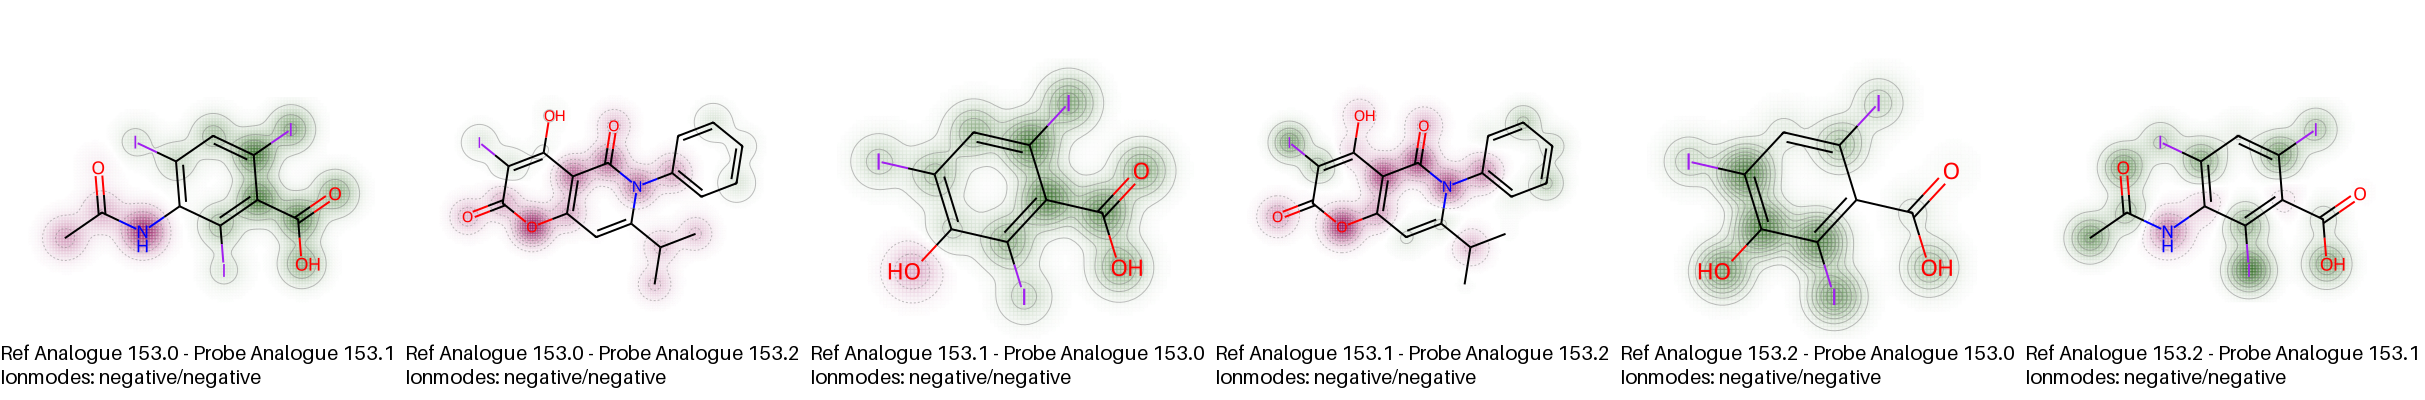

In [603]:
analogue_sim_maps = create_sim_maps(query_analogues, fp_function=MorganWrapper)
draw_images(analogue_sim_maps)

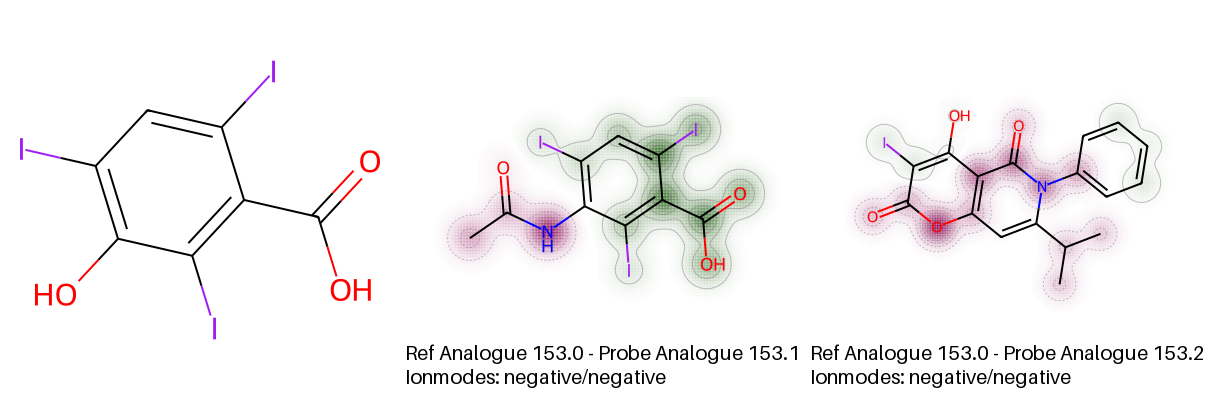

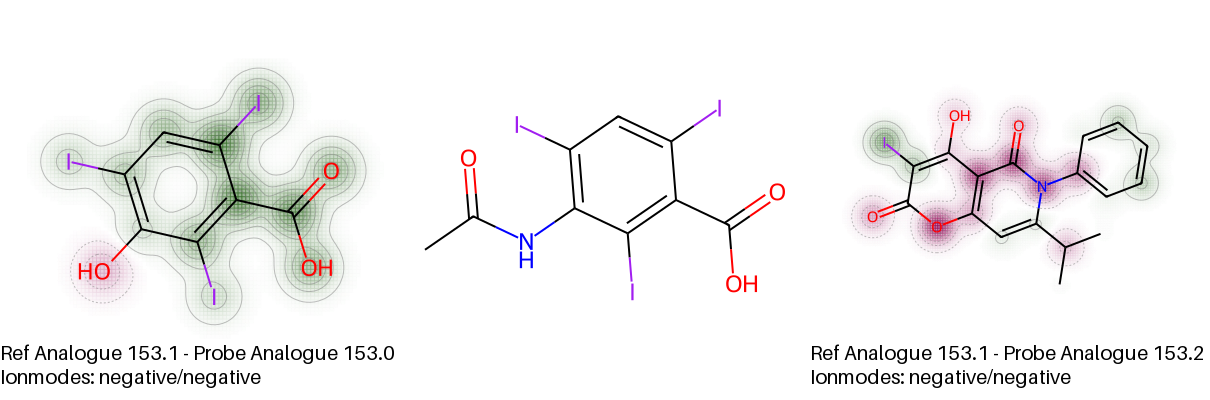

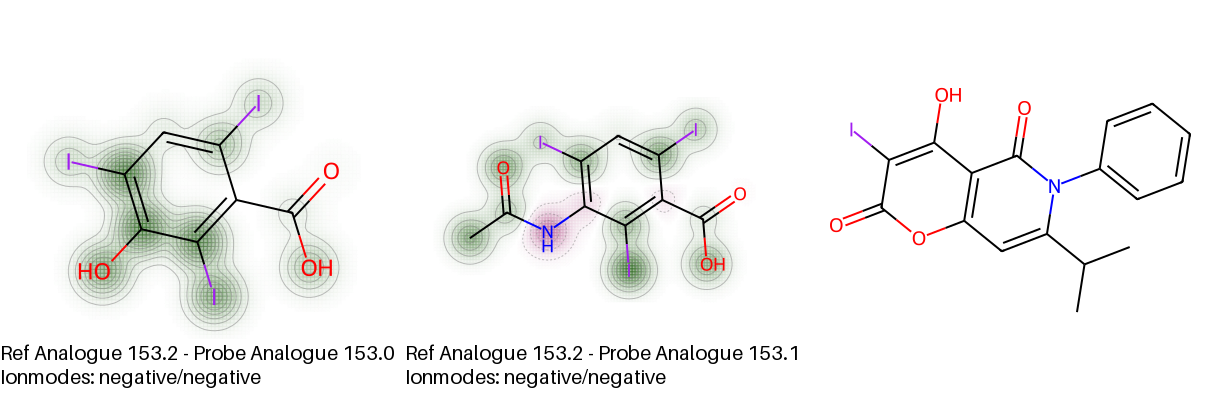

In [604]:
sim_maps_per_mol = (len(query_analogues) - 1)

assert len(analogue_sim_maps) == sim_maps_per_mol * len(query_analogues)

sim_map_id = 0
for mol_id, mol in enumerate(query_analogues):
    vis_list = []
    draw2d = Draw.MolDraw2DCairo(400, 400)
    for sim_id in range(sim_map_id, sim_map_id + sim_maps_per_mol):
        vis_list.append(analogue_sim_maps[sim_id])
    sim_map_id += sim_maps_per_mol
    vis_list.insert(mol_id, draw_mol(draw2d, mol))
    display(draw_images(vis_list))

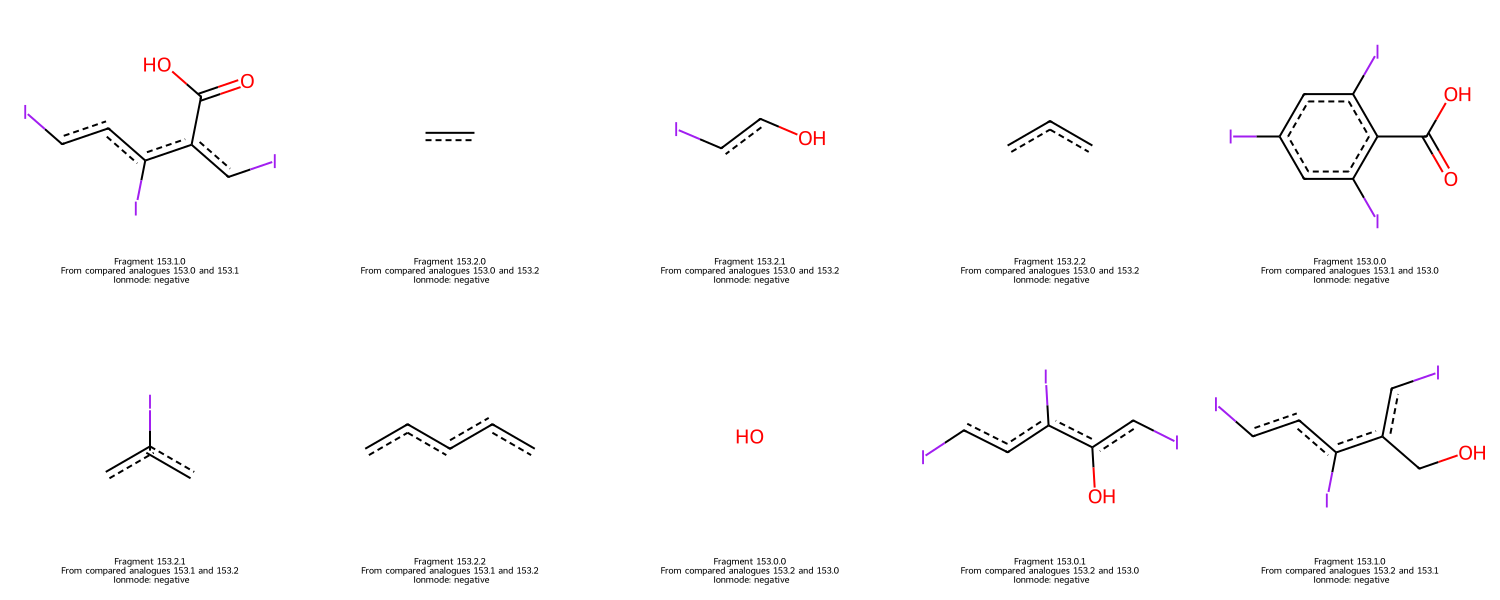

In [605]:
from ms_chemical_space_explorer.fragment_extractor import extract_sim_map_fragments_from_analogues
from ms_chemical_space_explorer.chemical_space_visualizer import visualize_similarity_fragments

fragments = extract_sim_map_fragments_from_analogues(query_analogues, SIM_MAP_THESHOLD, MorganWrapper)
#remove duplicate fragments by comparing smiles
unique_smiles = set()
unique_fragments = []
for fragment in fragments:
    smiles = Chem.MolToSmiles(fragment)
    if smiles not in unique_smiles:
        unique_smiles.add(smiles)
        unique_fragments.append(fragment)
visualize_similarity_fragments(unique_fragments, FRAGMENTS_PER_ROW)

In [606]:
def find_fragment_in_mol(mol, fragment):
    matches = mol.GetSubstructMatches(fragment)
    return len(matches) > 0

num_matching_fragments = 0
sum_atoms_in_matching_fragments = 0
for fragment in unique_fragments:
    if(find_fragment_in_mol(query_mol, fragment)):
        sum_atoms_in_matching_fragments += fragment.GetNumAtoms()
        num_matching_fragments += 1

num_fragments = len(unique_fragments)
query_size = query_mol.GetNumAtoms()
avg_fragment_size = sum_atoms_in_matching_fragments / num_matching_fragments if num_matching_fragments > 0 else 0
fragment_score = avg_fragment_size / query_size * num_matching_fragments / num_fragments

print(f"Found {num_matching_fragments}/{num_fragments} analogue fragments in the query molecule: {num_matching_fragments/num_fragments*100:.2f}%")
print(f"Average fragment size: {avg_fragment_size:.2f} atoms. Query size: {query_size} atoms: {avg_fragment_size/query_size:.2f}")
print(f"Score: {fragment_score:.2f}")

Found 4/10 analogue fragments in the query molecule: 40.00%
Average fragment size: 2.75 atoms. Query size: 30 atoms: 0.09
Score: 0.04


#### What should my SimMap Fragment algorithm acuatually find???

I want to find fragments in the analogues, that are also present in the query spectrum. A stupid way to that, would be just to find all the single C atoms, because there are lots in the analogues and the query atom. I can punish this, by removing all duplicate fragments. This way,
- **the more unique fragments are found, the better!**. 

There is a drawback to removing the duplicates though. If a fragment is occuring multiple times in a single analogue, and just as many times in the query, that might be a clue for similarity. The removing could be countered by counting the occurances and rewarding a similiar count, but that would also bring back the problem with single C atoms: 
- **Multiple fragment occurances in the query mol are disregarded** 
to keep this project from exploding.

As I am not interested in single C atoms, I might also state, that I want to find large fragments. Large could mean a high number of atoms, or a high number of mass. I am unsure what would be better so I am going for the easier solution to reward fragments with a lot of atoms: 
- **The more atoms in a single fragment, the better!** and **Mass of fragments is disregarded!**

After all, the fragments should be contained in the query mol. So this is actually the most important to the score: 
- **Fragments that are no substructure of the query spectrum, are punished!**. 

This could be a good counter balance to the general reward of large atoms and just finding a lot of fragments.


The quality of the fragments found will be scored like this:
```
n = number of fragments occuring in the query
m = average of number of atoms in a fragment
o = number of fragments NOT occuring in the query

s = (n - o) * m
```

To normalize the score, fragment size will be divided through the number of atoms in the query molecule. Fragments that are larger than the query molecule would achieve average fragment size > 1. So only the fragments contained in the substructure will contribute to the average fragment size multiplier. 

```
num_fragments = total number of fragments, that were extracted from the analogues
num_matching_fragments = number of fragments occurring in the query
query_size = number of atoms in the query molecule
avg_fragment_size = average number of atoms in matching fragments
fragment_score = avgFragmentSize / query size * num_matching_fragments / num_fragments
```


In [641]:
from ms_chemical_space_explorer.fragment_extractor import extract_sim_map_fragments_from_analogues
from ms_chemical_space_explorer.chemical_space_visualizer import visualize_similarity_fragments

def calculate_fragment_score(query_mol, fragments, debug=False):
    unique_smiles = set()
    unique_fragments = []
    for fragment in fragments:
        smiles = Chem.MolToSmiles(fragment)
        if smiles not in unique_smiles:
            unique_smiles.add(smiles)
            unique_fragments.append(fragment)
    
    num_matching_fragments = 0
    sum_atoms_in_matching_fragments = 0
    for fragment in unique_fragments:
        if(len(query_mol.GetSubstructMatches(fragment)) > 0):
            sum_atoms_in_matching_fragments += fragment.GetNumAtoms()
            num_matching_fragments += 1

    num_fragments = len(unique_fragments)
    query_size = query_mol.GetNumAtoms()
    avg_fragment_size = sum_atoms_in_matching_fragments / num_matching_fragments if num_matching_fragments > 0 else 0
    fragment_score = avg_fragment_size / query_size * num_matching_fragments / num_fragments

    if(debug):
        print(f"Found {num_matching_fragments}/{num_fragments} analogue fragments in the query molecule: {num_matching_fragments/num_fragments*100:.2f}%")
        print(f"Average fragment size: {avg_fragment_size:.2f} atoms. Query size: {query_size} atoms: {avg_fragment_size/query_size:.2f}")
        print(f"Score: {fragment_score:.3f}")
    return fragment_score

In [642]:
from ms_chemical_space_explorer.fragment_extractor import generate_mols_from_spectrum_query

query_mol = Chem.MolFromSmiles(query_spectra[QUERY_SPECTRUM_ID].metadata["smiles"])
query_analogues_df = all_analogues[all_analogues["query_spectrum_id"] == QUERY_SPECTRUM_ID]
query_analogues = generate_mols_from_spectrum_query(spectrum_query_result=query_analogues_df)

fragments = extract_sim_map_fragments_from_analogues(query_analogues, 0.9, MorganWrapper,)
calculate_fragment_score(query_mol, fragments,  debug=True)

Found 2/3 analogue fragments in the query molecule: 66.67%
Average fragment size: 2.50 atoms. Query size: 30 atoms: 0.08
Score: 0.056


0.05555555555555555

## BitVector Fragments

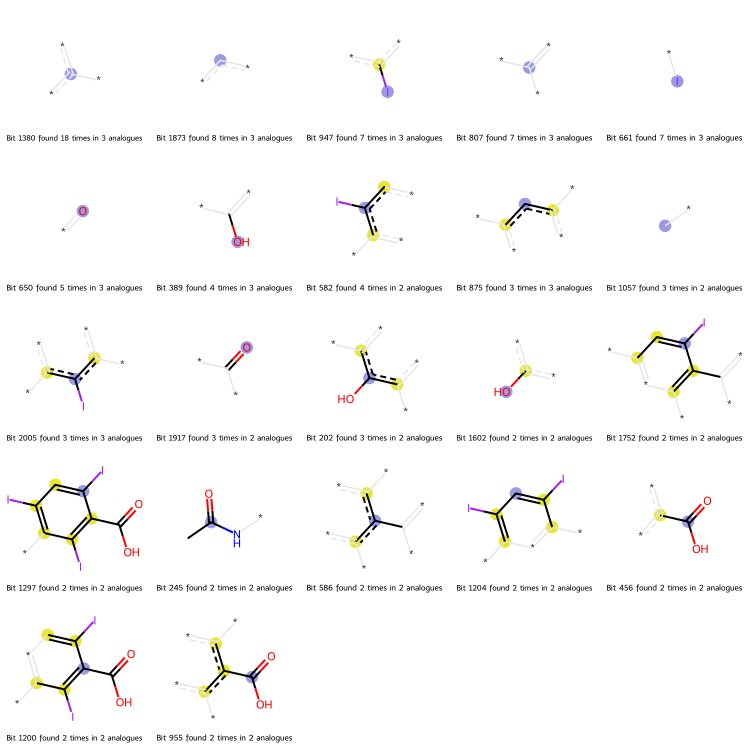

In [608]:
from ms_chemical_space_explorer.fragment_extractor import extract_bitvector_fragments_from_analogues

extract_bitvector_fragments_from_analogues(query_analogues, MORGAN_RADIUS, fragments_per_row=FRAGMENTS_PER_ROW, count_threshold=0)

## Spectra Plotting

#### old

In [609]:
import matplotlib.pyplot as plt
import numpy as np

def parse_mgf_spectrum(file_path, spectrum_index=0):
    """Parse a single spectrum from an MGF file.
    
    Args:
        file_path (str): Path to the MGF file
        spectrum_index (int): Index of the spectrum to parse (0-based)
    
    Returns:
        tuple: (metadata dict, m/z array, intensity array)
    """
    with open(file_path, 'r') as f:
        mgf_text = f.read()
    
    spectra = mgf_text.split('BEGIN IONS')
    if spectrum_index + 1 >= len(spectra):
        raise ValueError(f"Spectrum index {spectrum_index} not found. File contains {len(spectra)-1} spectra.")
        
    spectrum_text = spectra[spectrum_index + 1].split('END IONS')[0]
    
    # Extract metadata and peaks
    metadata = {}
    peaks_mz = []
    peaks_intensity = []
    
    for line in spectrum_text.split('\n'):
        line = line.strip()
        if not line:
            continue
            
        if '=' in line:
            key, value = line.split('=', 1)
            metadata[key] = value
        elif line[0].isdigit():
            try:
                mz, intensity = map(float, line.split())
                peaks_mz.append(mz)
                peaks_intensity.append(intensity)
            except ValueError:
                continue  # Skip lines that can't be parsed as peaks
            
    return metadata, np.array(peaks_mz), np.array(peaks_intensity)

def plot_spectrum(mz, intensity, metadata, title=None):
    """Create a mass spectrum plot.
    
    Args:
        mz (array): m/z values
        intensity (array): intensity values
        metadata (dict): spectrum metadata
        title (str, optional): custom title for the plot
    """
    plt.figure(figsize=(12, 6))
    
    # Create stem plot for the spectrum
    markerline, stemlines, baseline = plt.stem(
        mz, 
        intensity,
        use_line_collection=True
    )
    plt.setp(markerline, 'markerfacecolor', 'navy')
    plt.setp(stemlines, 'color', 'navy')
    plt.setp(baseline, 'color', 'gray')
    
    # Set labels and title
    plt.xlabel('m/z')
    plt.ylabel('Relative Intensity')
    if title:
        plt.title(title)
    else:
        compound_name = metadata.get('COMPOUND_NAME', 'Unknown Compound')
        precursor_mz = metadata.get('PRECURSOR_MZ', 'N/A')
        formula = metadata.get('FORMULA', '')
        title_text = f'{compound_name}\nPrecursor m/z: {precursor_mz}'
        if formula:
            title_text += f'\nFormula: {formula}'
        plt.title(title_text)
    
    # Add grid
    plt.grid(True, alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    
    return plt.gcf()

C:\Users\kevin\AppData\Local\Temp\ipykernel_19996\1890212904.py:58: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(


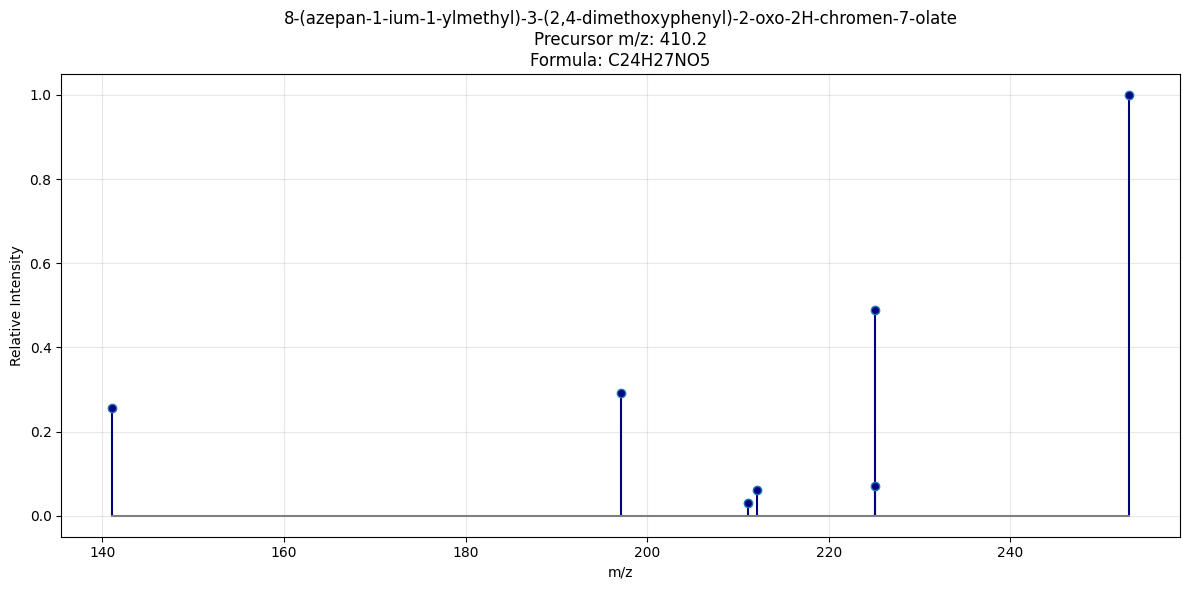


Spectrum Metadata:
Compound: 8-(azepan-1-ium-1-ylmethyl)-3-(2,4-dimethoxyphenyl)-2-oxo-2H-chromen-7-olate
Formula: C24H27NO5
Precursor m/z: 410.2
Adduct: [M+H]+


In [610]:
spectrum_index = 600

# Parse and plot spectrum
metadata, mz, intensity = parse_mgf_spectrum(FILENAME, spectrum_index=spectrum_index)
plot_spectrum(mz, intensity, metadata)
plt.show()

# Print some metadata
print("\nSpectrum Metadata:")
print(f"Compound: {metadata.get('COMPOUND_NAME', 'Unknown')}")
print(f"Formula: {metadata.get('FORMULA', 'Not specified')}")
print(f"Precursor m/z: {metadata.get('PRECURSOR_MZ', 'Not specified')}")
print(f"Adduct: {metadata.get('ADDUCT', 'Not specified')}")

#### matchMS

In [611]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matchms.plotting.spectrum_plots import plot_spectra_mirror
from matplotlib.lines import Line2D

def plot_spectra_multi_mirror(reference, spectra, figsize=(10, 7), cmap='tab10'):
    """
    Plot a reference spectrum against multiple comparison spectra with transparent background.
    
    Parameters:
    -----------
    reference : matchms.Spectrum
        The reference spectrum to compare against
    spectra : list of matchms.Spectrum
        List of spectra to compare with the reference
    figsize : tuple, default=(10, 7)
        Figure size
    cmap : str, default='tab10'
        Matplotlib colormap to use for the spectra colors
        
    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
    """

    # Create a single figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_alpha(0.0)
    ax.patch.set_alpha(0.0)
    
    # Get colormap and generate colors for all spectra (reference + comparison)
    colormap = cm.get_cmap(cmap)
    all_colors = [colormap(i / (len(spectra))) for i in range(len(spectra) + 1)]
    
    # First color for reference, rest for comparison spectra
    ref_color = all_colors[0]
    comp_colors = all_colors[1:]
    
    # Calculate alpha values - decreasing for each additional spectrum
    alphas = [1.0 - (i * (0.6 / max(1, len(spectra) - 1))) for i in range(len(spectra))]
    
    # Plot each comparison
    for i, (spectrum, color, alpha) in enumerate(zip(spectra, comp_colors, alphas)):
        plot_spectra_mirror(reference, spectrum, ax=ax, 
                           color_top=ref_color, color_bottom=color, 
                           **{"alpha": alpha})
    
    # Make text backgrounds transparent
    for text in ax.texts:
        text.set_backgroundcolor('none')
    
    # Create custom legend with correct spectrum labels
    legend_elements = [Line2D([0], [0], color=ref_color, lw=2, 
                             label=reference.metadata.get("compound_name", f"Reference"))]
    
    for i, (spectrum, color, alpha) in enumerate(zip(spectra, comp_colors, alphas)):
        name = spectrum.metadata.get("compound_name", f"Spectrum {i+1}")
        legend_elements.append(Line2D([0], [0], color=color, lw=2, alpha=alpha, label=name))
    
    ax.legend(handles=legend_elements, loc='upper right')
    
    return fig, ax

C:\Users\kevin\AppData\Local\Temp\ipykernel_19996\3813411350.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(cmap)


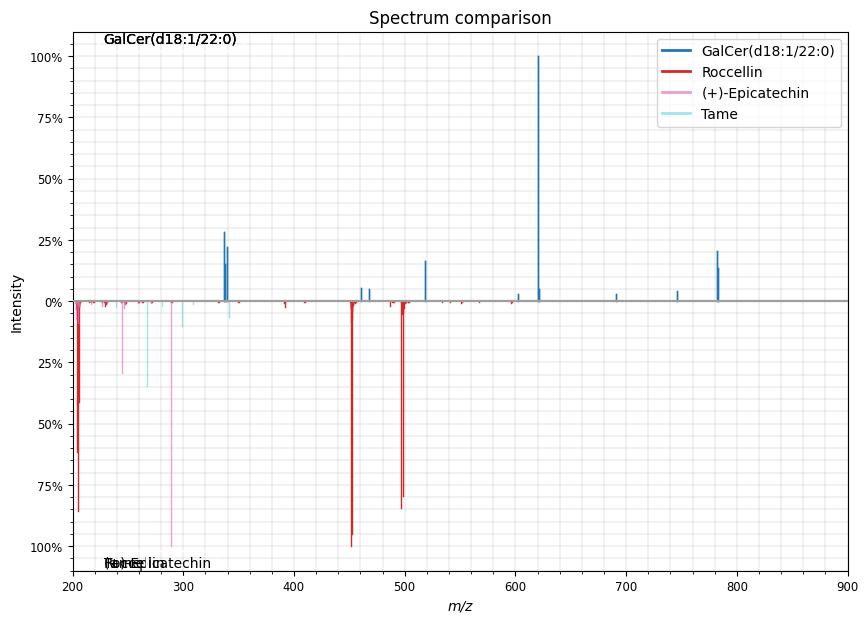

In [612]:
spectra = [query_spectra[2], query_spectra[3], query_spectra[5]]
fig, ax = plot_spectra_multi_mirror(query_spectra[0], spectra )

# # Save the figure
# plt.savefig('combined_spectra.png', transparent=True, dpi=300)

In [613]:
import matplotlib.pyplot as plt

def set_transparent(fig, ax):
    # Set transparent background for both figure and axes
    fig.patch.set_alpha(0.0)  # Make figure background transparent
    ax.patch.set_alpha(0.0)   # Make axes background transparent

    # Make text label backgrounds transparent
    for text in ax.texts:
        text.set_backgroundcolor('none')

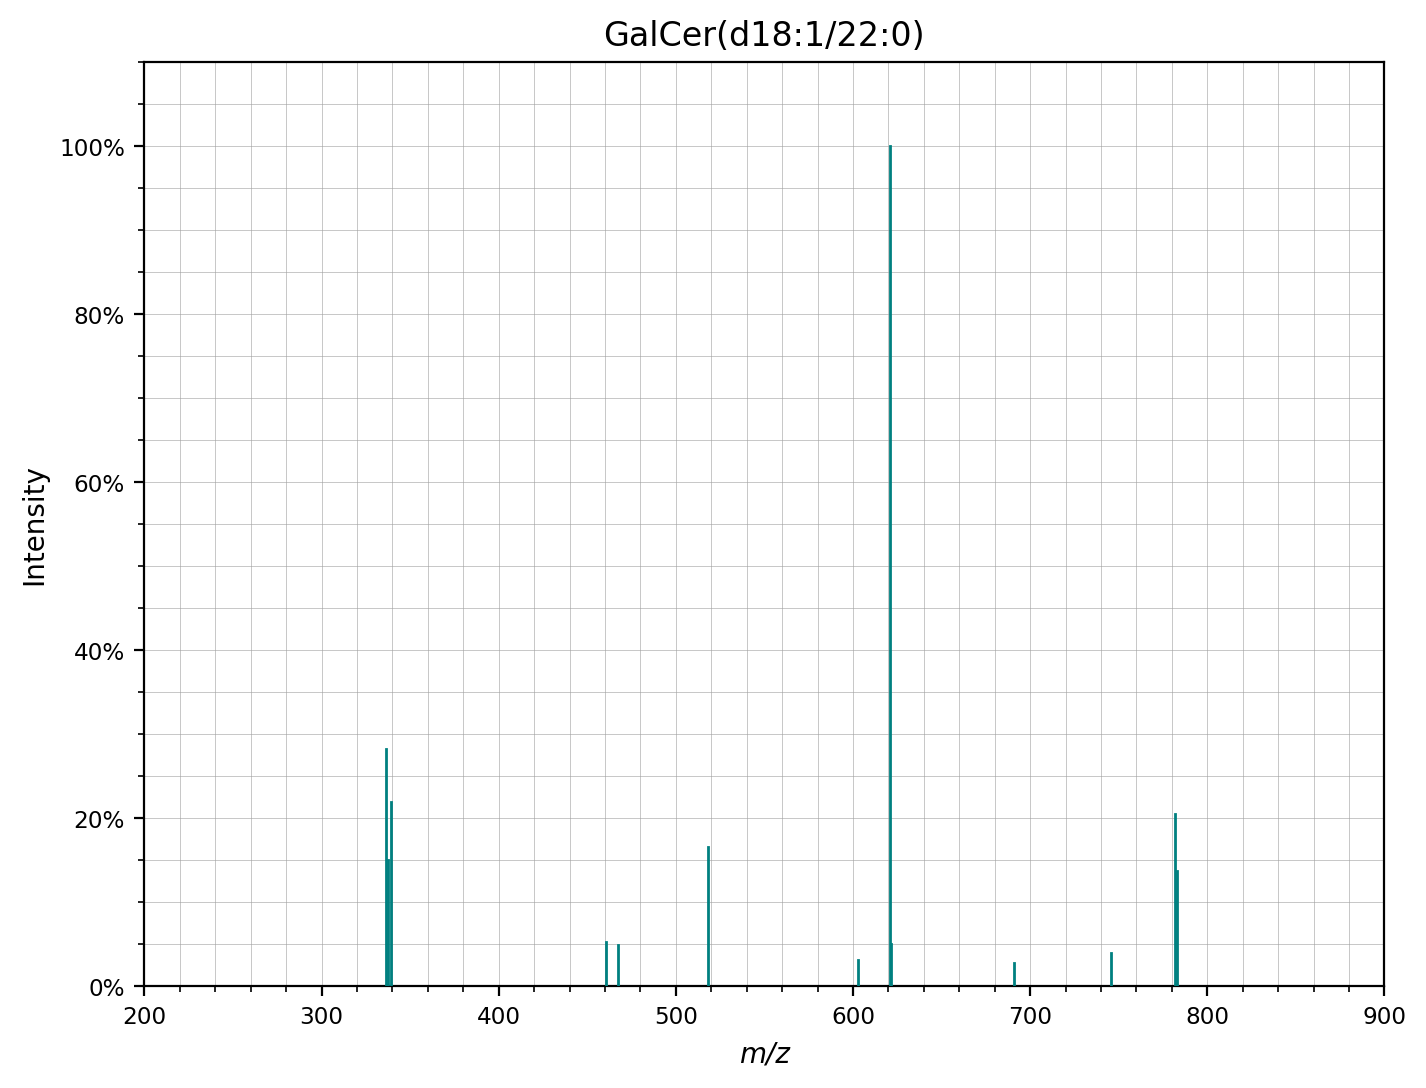

In [614]:
fig, ax = query_spectra[0].plot()
set_transparent(fig, ax)	
plt.show()

#### SpectraUtils

matchMS useds spectraUtils code. Might as well use the [original](https://spectrum-utils.readthedocs.io/en/latest/plotting.html) with all the extra functionality including interactive plots.